# **Results**

In [116]:
# magics
%load_ext autoreload
%reload_ext autoreload

%autoreload 2

# load general packages
import tools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_nvfi import model_bufferstock

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/67/5lclr44x13d7lzxtqq4c11r40000gn/T/ipykernel_1111/952247622.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [117]:
model = model_bufferstock()

In [118]:
sol = model.sol
par = model.par
aux = model.aux

model.setup()
model.allocate()

In [187]:
model.choice_set()

For period  4
n_min =  -3.3600000000000003
n_max =  4.08
d_min =  0.0
d_max =  2.8800000000000003
For period  3
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/andreas/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/67/5lclr44x13d7lzxtqq4c11r40000gn/T/ipykernel_1111/166811635.py", line 1, in <module>
    model.choice_set()
  File "/Users/andreas/BufferStock/model_nvfi.py", line 135, in choice_set
    c_grid = self.grid_c(n_bar,d)
  File "/Users/andreas/BufferStock/model_nvfi.py", line 338, in grid_c
    grid_c = np.linspace(lower, upper, par.N)
  File "<__array_function__ internals>", line 180, in linspace
  File "/Users/andreas/opt/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py", line 142, in linspace
    if _nx.any(step == 0):
  File "<__array_function__ internals>", line 180, in any
  File "/Users/andreas/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py", line 2397, in any
    return _wrapreduction(a, np.logical_or, 'any', axis,

In [153]:
model.solve_vfi()

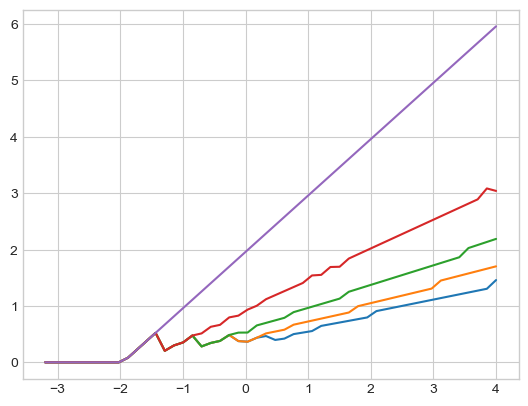

In [178]:
for t in range(par.T):
    plt.plot(aux.grid_n,sol.c[t,:,30,0])

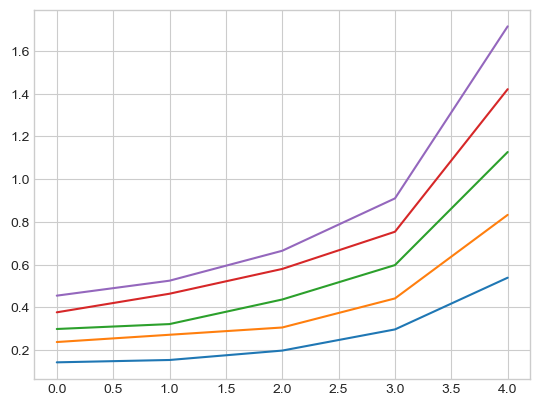

In [182]:
for n in range(25,35,2):
    plt.plot([0,1,2,3,4],sol.c[:,n,1,0])

In [154]:
aux.d_post_grid

array([0.        , 0.05877551, 0.11755102, 0.17632653, 0.23510204,
       0.29387755, 0.35265306, 0.41142857, 0.47020408, 0.52897959,
       0.5877551 , 0.64653061, 0.70530612, 0.76408163, 0.82285714,
       0.88163265, 0.94040816, 0.99918367, 1.05795918, 1.11673469,
       1.1755102 , 1.23428571, 1.29306122, 1.35183673, 1.41061224,
       1.46938776, 1.52816327, 1.58693878, 1.64571429, 1.7044898 ,
       1.76326531, 1.82204082, 1.88081633, 1.93959184, 1.99836735,
       2.05714286, 2.11591837, 2.17469388, 2.23346939, 2.2922449 ,
       2.35102041, 2.40979592, 2.46857143, 2.52734694, 2.58612245,
       2.64489796, 2.70367347, 2.76244898, 2.82122449, 2.88      ])

In [141]:
aux.n_post_grid

array([-3.36      , -3.20816327, -3.05632653, -2.9044898 , -2.75265306,
       -2.60081633, -2.44897959, -2.29714286, -2.14530612, -1.99346939,
       -1.84163265, -1.68979592, -1.53795918, -1.38612245, -1.23428571,
       -1.08244898, -0.93061224, -0.77877551, -0.62693878, -0.47510204,
       -0.32326531, -0.17142857, -0.01959184,  0.1322449 ,  0.28408163,
        0.43591837,  0.5877551 ,  0.73959184,  0.89142857,  1.04326531,
        1.19510204,  1.34693878,  1.49877551,  1.65061224,  1.80244898,
        1.95428571,  2.10612245,  2.25795918,  2.40979592,  2.56163265,
        2.71346939,  2.86530612,  3.01714286,  3.16897959,  3.32081633,
        3.47265306,  3.6244898 ,  3.77632653,  3.92816327,  4.08      ])

Check last period

In [119]:
model.solve_last_period()

T ===========  9


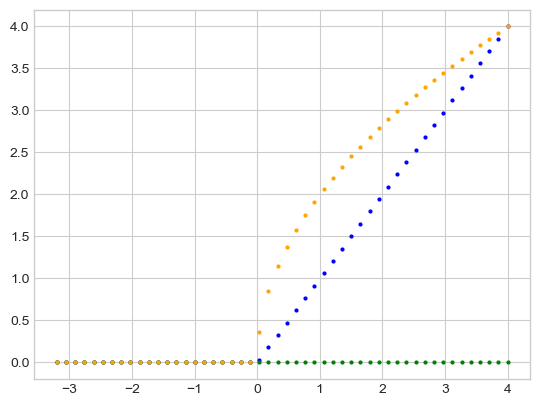

In [120]:
plt.plot(aux.grid_n, sol.c[par.T-1,:,0,0], 'o', ms=2, color='blue')
plt.plot(aux.grid_n, sol.d[par.T-1,:,0,0], 'o', ms=2, color='green')
plt.plot(aux.grid_n, sol.v[par.T-1,:,0,0], 'o', ms=2, color='orange')

Check post-decision value function

In [121]:
model.post_decision(par.T-2)

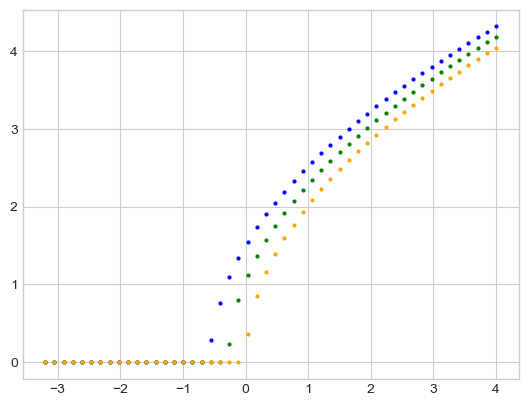

In [122]:
plt.plot(aux.grid_n, sol.w[par.T-2,:,10,0], 'o', ms=2, color='blue')
plt.plot(aux.grid_n, sol.w[par.T-2,:,5,0], 'o', ms=2, color='green')
plt.plot(aux.grid_n, sol.w[par.T-2,:,0,0], 'o', ms=2, color='orange')

Check interpolation of post-decision value function in keeper's problem

In [123]:
# Pick values from grid of n and d
n_bar = -2.0
d_bar = 0

# Calculate grid of c
c = model.grid_c(n_bar,d_bar)

# Post-decision states
n_bar_plus = (1 + par.r_a) * (n_bar - c) - (par.r_d - par.r_a) * d_bar
d_bar_plus = (1 - par.lambdaa) * d_bar * np.ones(par.N)

# Interpolation
v_plus = tools.interp_2d_vec(aux.grid_n, aux.grid_d, sol.w[par.T-2,:,:,0], n_bar_plus, d_bar_plus)

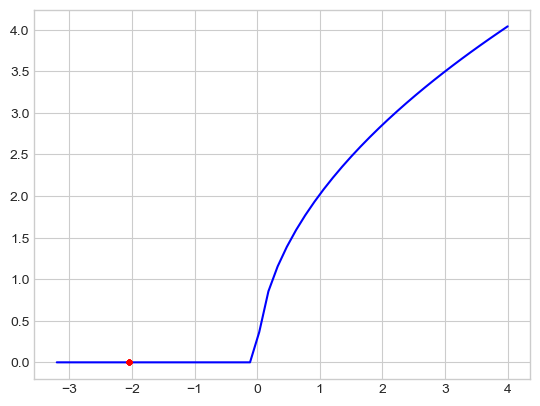

In [124]:
# Post-decision value function
plt.plot(aux.grid_n, sol.w[par.T-2,:,0,0], '-', ms=2, color='blue')

# Interpolated points
plt.plot(n_bar_plus[::3], v_plus[::3], 'o', ms=3, color='red')

In [131]:
model.setup()
par.T = 5
par.N = 50
model.allocate()
model.solve_nvfi(keeper_only=False)

T ===========  4
T ===========  3
T ===========  2
T ===========  1
T ===========  0


Da fuck

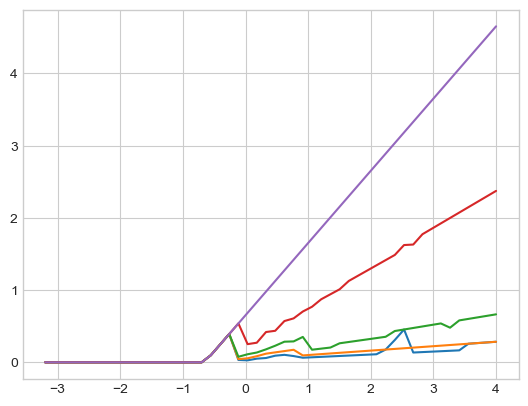

In [132]:
for t in range(par.T):
    plt.plot(aux.grid_n, sol.c_keep[t,:,10,0])

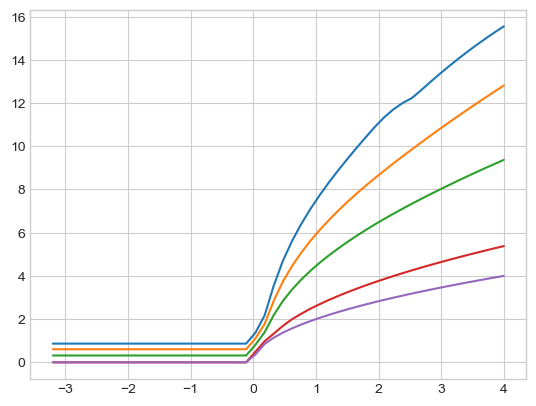

In [133]:
for t in range(par.T):
    plt.plot(aux.grid_n, sol.v_keep[t,:,0,0])